<a href="https://colab.research.google.com/github/deepakr82/AIML-Caps-Prj-Grp6-I-NLP/blob/master/NLP_Capstone_IT_Ticket_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Online Capstone - AUTOMATIC TICKET ASSIGNMENT

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Load data and Pre-processing


In [2]:
import pandas as pd 
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn import preprocessing

In [3]:
import os
project_path = '/content/drive/My Drive/Colab Notebooks'
os.chdir(project_path)
file_name = "input_data.xlsx"
# Read the .csv file
Ticket = pd.read_excel(file_name)

In [4]:
Ticket.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [5]:
# Get the shape and size of the dataset
print('No of rows:\033[1m', Ticket.shape[0], '\033[0m')
print('No of cols:\033[1m', Ticket.shape[1], '\033[0m')

No of rows: 8500 
No of cols: 4 


In [6]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
Ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [7]:
# Describe the dataset with various summary and statistics
Ticket.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [8]:
# Find out the null value counts in each column
Ticket.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

Observations:
1. The dataset comprises of **8500 rows** and **4 columns**.
2. All columns are of type object containing textual information.
3. There are **8 null/missing values** present in the Short description and **1 null/missing values** present in the description column
4. **Password reset** is one of the most occuring tickets which reflects in the Short description column.

In [9]:
# Let's look at the rows with null values
Ticket[pd.isnull(Ticket).any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [10]:
#Check for Null and drop null rows - Since null count is less
Ticket.isnull().sum()
Ticket.dropna(inplace=True)
Ticket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8491 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8491 non-null   object
 1   Description        8491 non-null   object
 2   Caller             8491 non-null   object
 3   Assignment group   8491 non-null   object
dtypes: object(4)
memory usage: 331.7+ KB


In [11]:
callers = Ticket['Caller'].unique()
Ticket.drop(columns='Caller',inplace=True)
Ticket.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


In [12]:
Ticket.describe()

,Short description,Description,Assignment group
count,8491,8491,8491
unique,7480,7812,74
top,password reset,the,GRP_0
freq,38,56,3968


In [13]:
TargetClass = Ticket['Assignment group'].value_counts()
TargetClass.describe()

count      74.000000
mean      114.743243
std       464.840614
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3968.000000
Name: Assignment group, dtype: float64

Observations:
1. There are 74 Groups in all. The Target class distribution is extremely skewed.
2. GRP_0 has the most number of assignments (3968) accounting for ~50% of the data.
3. There are some groups with 1 ticket assignment as well.

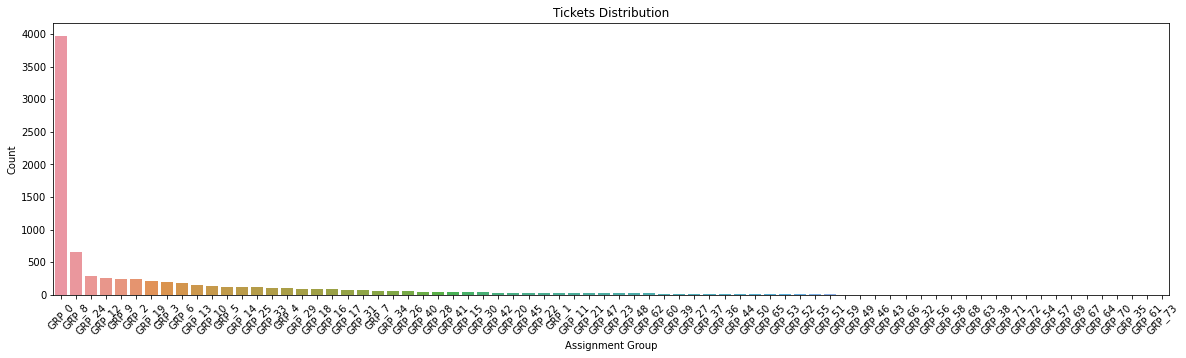

In [14]:
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=Ticket,order = Ticket['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.title('Tickets Distribution')

plt.show()

Merge groups with small entries to a group to reduce the imbalance in the target class.

In [15]:
# Group the tickets count < 50 as GRP_A
Ticket1 = pd.DataFrame(Ticket['Assignment group'].value_counts())
Ticket1 = Ticket1.T
Ticket1

,GRP_0,GRP_8,GRP_24,GRP_12,GRP_9,GRP_2,GRP_19,GRP_3,GRP_6,GRP_13,GRP_10,GRP_5,GRP_14,GRP_25,GRP_33,GRP_4,GRP_29,GRP_18,GRP_16,GRP_17,GRP_31,GRP_7,GRP_34,GRP_26,GRP_40,GRP_28,GRP_41,GRP_15,GRP_30,GRP_42,GRP_20,GRP_45,GRP_22,GRP_1,GRP_11,GRP_21,GRP_47,GRP_23,GRP_48,GRP_62,GRP_60,GRP_39,GRP_27,GRP_37,GRP_36,GRP_44,GRP_50,GRP_65,GRP_53,GRP_52,GRP_55,GRP_51,GRP_59,GRP_49,GRP_46,GRP_43,GRP_66,GRP_32,GRP_56,GRP_58,GRP_68,GRP_63,GRP_38,GRP_71,GRP_72,GRP_54,GRP_57,GRP_69,GRP_67,GRP_64,GRP_70,GRP_35,GRP_61,GRP_73
Assignment group,3968,661,289,257,252,241,215,200,184,145,140,129,118,116,107,100,97,88,85,81,69,68,61,56,45,44,40,39,39,37,36,35,31,31,30,29,27,25,25,25,20,19,18,16,15,15,14,11,11,9,8,8,6,6,6,5,4,4,3,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1


In [16]:
Ticket_old = Ticket
Ticket['Count'] = Ticket.apply(lambda row: Ticket1[row['Assignment group']] , axis=1)
Ticket.loc[Ticket['Count'] <= 50 , "Assignment group"] = "GRP_A"

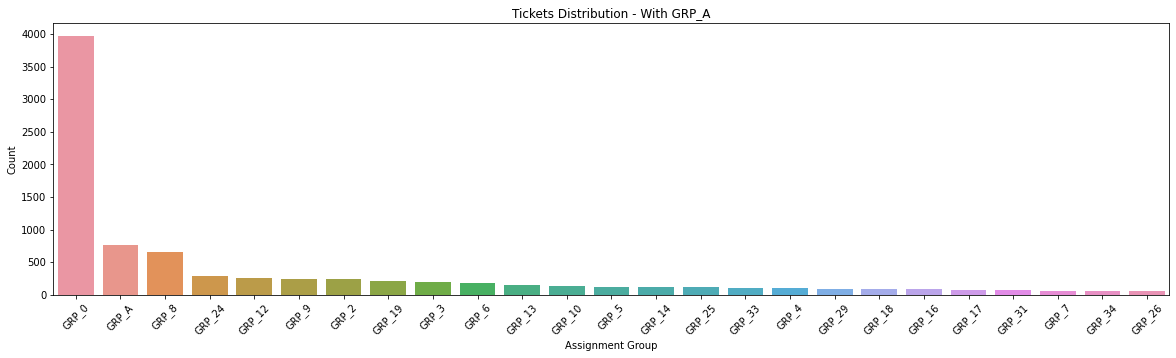

In [17]:
plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=Ticket,order = Ticket['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.title('Tickets Distribution - With GRP_A')

plt.show()

Drop "Short description" column

In [18]:
#Ticket['Description'] = Ticket['Short description'] + ' '+ Ticket['Description']
Ticket.drop(columns=['Short description','Count'],inplace=True)
Ticket.head()

,Description,Assignment group
0,-verified user details.(employee# & manager na...,GRP_0
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,GRP_0
4,skype error,GRP_0


# Data Cleansing

Text preprocessing is the process of transferring text from human language to machine-readable format for further processing. After a text is obtained, we start with text normalization. 

Text normalization includes:
*   Converting all letters to lower or upper case
*   Converting numbers into words or removing numbers
*   Removing punctuations, accent marks and other diacritics
*   Removing white spaces
*   Removing stop words, sparse terms, and particular words





In [19]:
import string

# NLP toolkits
import spacy
import nltk
from nltk import tokenize

In [21]:
# Define a function to clean the data
import re
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False
        
def clean_data(text):
    text = text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [22]:
# Apply the cleaning function to entire dataset
Ticket['Description'] = Ticket['Description'].apply(clean_data)

# Verify the data
Ticket.head()

,Description,Assignment group
0,verified user details employee and manager nam...,GRP_0
1,hello team my meetings skype meetings etc are ...,GRP_0
2,hi cannot log on to vpn best,GRP_0
3,unable to access hr tool page,GRP_0
4,skype error,GRP_0


Comments:

Entire dataset is converted into lower case

*   Users email addresses will add NO value to our analysis, despite the fact that user id is given in the caller column. So all email adresses are removed from the dataset
*   All numerals are removed because they were dominating the dataset if we were converting them into their word representation otherwise.
*   All punctuation marks are removed which used to be a hindrance in lemmatization.
*   All occurances of more than one blank spaces, horizontal tab spaces, new line breaks etc. have been replaced with single blank space.

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing. In grammar, inflection is known as the modification of a word to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, and mood. An inflection expresses one or more grammatical categories with a prefix, suffix or infix, or another internal modification such as a vowel change.

**Stemming**
Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

**Lemmatization**
Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization, root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.


Lemmatisation and stop words removal

In [23]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

Ticket['Description'] = Ticket['Description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [24]:
#Verify the data
Ticket.head()

,Description,Assignment group
0,verify user detail employee and manager name c...,GRP_0
1,hello team meeting skype meeting etc be not ap...,GRP_0
2,hi can not log on to vpn best,GRP_0
3,unable to access hr tool page,GRP_0
4,skype error,GRP_0


In [25]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
# Extend the English Stop Wordss
STOP_WORDS = STOPWORDS.union(['yes','na','hi','receive','hello','regards','thanks','see','help', 'etc','on',
                  'from','greeting','forward','reply','will','please','able','via'])


In [26]:
it_afterstop = Ticket
Ticket.head()

,Description,Assignment group
0,verify user detail employee and manager name c...,GRP_0
1,hello team meeting skype meeting etc be not ap...,GRP_0
2,hi can not log on to vpn best,GRP_0
3,unable to access hr tool page,GRP_0
4,skype error,GRP_0


In [27]:
it_afterstop['Description'] = it_afterstop['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))
it_afterstop.head()

,Description,Assignment group
0,verify user detail employee manager name check...,GRP_0
1,team meeting skype meeting appear outlook cale...,GRP_0
2,log vpn best,GRP_0
3,unable access hr tool page,GRP_0
4,skype error,GRP_0


In [28]:
maxlen = 0
for sentence in it_afterstop['Description']:
    if (maxlen < sentence.count(' ')+1 ):
        maxlen = sentence.count(' ')+1

print(maxlen)   

# Create Weighted Word Vectors
tfidf_vectors = TfidfVectorizer(min_df=3,max_features= maxlen)
tfidf_db = tfidf_vectors.fit_transform(it_afterstop['Description']).toarray()
tfidf_db = pd.DataFrame(tfidf_db)

844


In [29]:
tfidf_db.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221418,0.0,0.0,0.0,0.0,0.0,0.213451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.268259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.304569,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.575466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.37366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.parsing import preprocessing
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.phrases import Phraser
from gensim.models import Phrases, CoherenceModel

**Down Sampling** the data to bring the uniformity

**Topic Modeling**

Topic Modeling is a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package.

Let's first use gensim to implement LDA and find out any distinctive topics among GRP_0, followed by down-sampling the top topics to contain maximum number of tickets created for.

In [31]:
grp0_tickets = it_afterstop[it_afterstop['Assignment group'] == 'GRP_0']
grpnon0_tickets = it_afterstop[it_afterstop['Assignment group'] != 'GRP_0']

In [32]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
data_words = list(sent_to_words(grp0_tickets['Description'].values.tolist()))

In [33]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
data_words_bigrams = [bigram_mod[doc] for doc in data_words]

trigram_mod = gensim.models.phrases.Phraser(trigram)
data_words_trigrams = [trigram_mod[doc] for doc in data_words]

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [34]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words_bigrams]

In [35]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

for idx, topic in lda_model.print_topics():
    print('Topic: {} \nWords: {}'.format(idx+1, topic))
    print()

Topic: 1 
Words: 0.088*"password" + 0.051*"erp" + 0.048*"reset" + 0.042*"account" + 0.028*"sid" + 0.025*"user" + 0.024*"lock" + 0.021*"error" + 0.020*"request" + 0.015*"log"

Topic: 2 
Words: 0.019*"outlook" + 0.016*"access" + 0.016*"ticket" + 0.015*"company" + 0.014*"update" + 0.012*"work" + 0.012*"email" + 0.012*"need" + 0.011*"open" + 0.011*"device"

Topic: 3 
Words: 0.054*"issue" + 0.050*"unable" + 0.047*"tool" + 0.040*"login" + 0.038*"user" + 0.023*"connect" + 0.020*"system" + 0.017*"manager" + 0.015*"call" + 0.013*"resolve"



In [36]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.95667582665704

Coherence Score:  0.4289027284451518


Run LDA for each record of GRP_0 to find the associated topic based on the LDA score. As the topic modeling has been trained to accomodate only top 3 topics for entire GRP_0 data, any record scoring less than 50%, we categorize them into 4th(other) topic and such tickets are not the candidates for resampling.

In [37]:
# Function to Determine topic
TOPICS = {1:"Account/Password Reset", 2:"Access Issue", 3:"Communication Issue", 4:"Other Issues"}
def get_groups(text):
    bow_vector = id2word.doc2bow([word for word in simple_preprocess(text) if word not in STOP_WORDS])
    index, score = sorted(lda_model[bow_vector][0], key=lambda tup: tup[1], reverse=True)[0]
    return TOPICS[index+1 if score > 0.5 else 4], round(score, 2)

# Check for a Random record
text = grp0_tickets.reset_index().loc[np.random.randint(0, grp0_tickets.shape[1]),'Description']
topic, score = get_groups(text)
print("\033[1mText:\033[0m {}\n\033[1mTopic:\033[0m {}\n\033[1mScore:\033[0m {}".format(text, topic, score))

Text: team meeting skype meeting appear outlook calendar somebody advise correct kind
Topic: Other Issues
Score: 0.4399999976158142


In [38]:
# Apply the function to the dataset
grp0_tickets.insert(loc=grp0_tickets.shape[1]-1, 
                   column='Topic', 
                   value=[get_groups(text)[0] for text in grp0_tickets.Description])
grp0_tickets.head()

,Description,Topic,Assignment group
0,verify user detail employee manager name check...,Communication Issue,GRP_0
1,team meeting skype meeting appear outlook cale...,Other Issues,GRP_0
2,log vpn best,Other Issues,GRP_0
3,unable access hr tool page,Communication Issue,GRP_0
4,skype error,Account/Password Reset,GRP_0


In [39]:
# Count the records based on Topics
grp0_tickets.Topic.value_counts()

Access Issue              1284
Account/Password Reset    1171
Other Issues               801
Communication Issue        712
Name: Topic, dtype: int64

Observations:

From the above analysis, it's evident that the records are uniformly distributed

In [40]:
grp0_tickets_new = grp0_tickets.filter(['Description','Topic'], axis=1)
grp0_tickets_new.rename(columns = {'Topic': 'Assignment group'},inplace=True)
grp0_tickets_new.head()

,Description,Assignment group
0,verify user detail employee manager name check...,Communication Issue
1,team meeting skype meeting appear outlook cale...,Other Issues
2,log vpn best,Other Issues
3,unable access hr tool page,Communication Issue
4,skype error,Account/Password Reset


In [41]:
ticket_final = pd.concat([grp0_tickets_new, grpnon0_tickets]).reset_index(drop=True)

#Unique groups remaining: 28


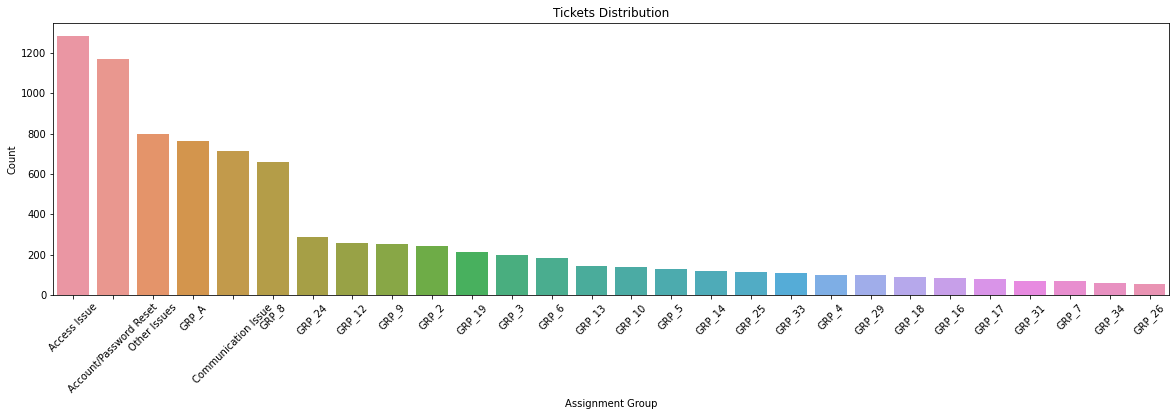

In [42]:
# Visualize the assignment groups distribution
print('\033[1m#Unique groups remaining:\033[0m', ticket_final['Assignment group'].nunique())
plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=ticket_final,order = ticket_final['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.title('Tickets Distribution')

plt.show()

In [43]:
ticket_final.shape

(8491, 2)

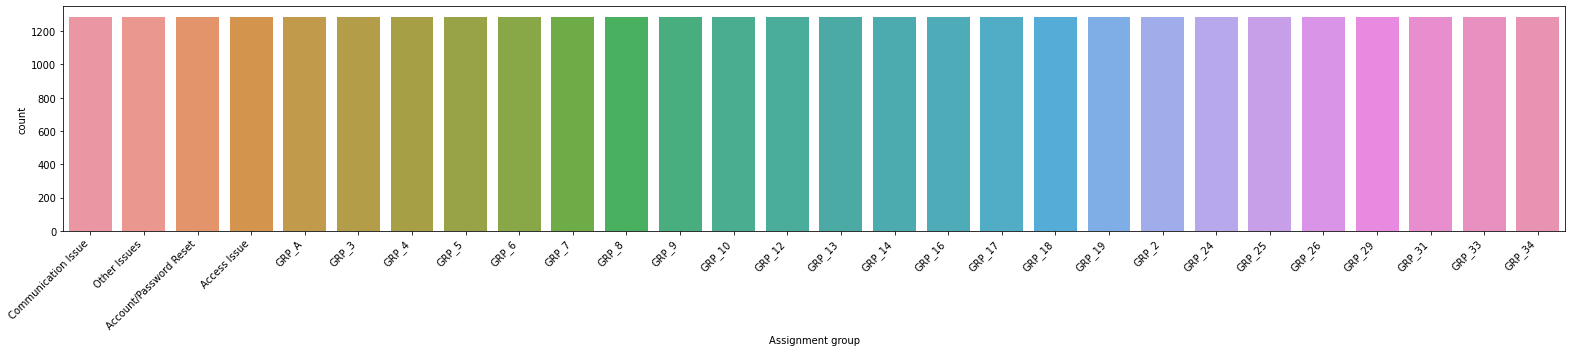

In [44]:
# Now upsample te data to bring down all the imbalance
from sklearn.utils import resample
max = ticket_final['Assignment group'].value_counts().max()
Ticket_resampled = ticket_final[0:0]
for grp in ticket_final['Assignment group'].unique():
    TicketGrp = ticket_final[ticket_final['Assignment group'] == grp]
    resampled = resample(TicketGrp, replace=True, n_samples=int(max), random_state=123)
    Ticket_resampled = Ticket_resampled.append(resampled)

descending_order = Ticket_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=Ticket_resampled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [45]:
value = Ticket_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_13', 'Account/Password Reset', 'GRP_24', 'GRP_26', 'GRP_19',
       'GRP_8', 'GRP_7', 'GRP_14', 'Access Issue', 'GRP_9', 'Other Issues',
       'GRP_4', 'GRP_34', 'GRP_3', 'GRP_25', 'GRP_17', 'GRP_16', 'GRP_5',
       'GRP_29', 'GRP_12', 'GRP_31', 'Communication Issue', 'GRP_10', 'GRP_33',
       'GRP_2', 'GRP_6', 'GRP_18', 'GRP_A'],
      dtype='object')

In [46]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 
Ticket_resampled['Assignment group']= le.fit_transform(Ticket_resampled['Assignment group'])

In [47]:
Ticket_resampled.shape

(35952, 2)

In [48]:
# Create Weighted Word Vectors
tfidf_vectors = TfidfVectorizer(min_df=3,max_features= maxlen)
tfidf_db1 = tfidf_vectors.fit_transform(Ticket_resampled['Description']).toarray()
tfidf_db1 = pd.DataFrame(tfidf_db1)
tfidf_db1.shape

(35952, 844)

**Splitting the data in 80:20**

In [49]:
from sklearn.model_selection import train_test_split
X = tfidf_db1
y = Ticket_resampled['Assignment group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (28761, 844) (28761,)
Shape of the test set: (7191, 844) (7191,)


# Model Building

For this dataset, we will build some traditional models and RNN.
*   Multnomial Naive Bayes
*   Support Vector Machine
*   Decision Tree
*   Random Forest
*   Ensemble
*   LSTM
*   DNN
*   RCNN

In [50]:
#import all the packages
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import accuracy_score
#import Grid Search
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [50]:
# Creating Dataframe to save results for each executed model 
result_df = pd.DataFrame(columns=['Model', 'Test_Accuracy'])
result_df['Model']=['NB','SVM','D-Tree','RandomForest','Bagging_Ensemble','Boosting_Ensemble','LSTM','DNN','RCNN']

**Multinomial Naive Bayes**

In [51]:
NBModel = MultinomialNB(alpha = 0.001)
NBModel.fit(X_train, y_train)
NB_y_pred = NBModel.predict(X_test)
print('NB Training Accuracy:', 100*NBModel.score(X_train , y_train))
print('NB Test Accuracy:', 100*NBModel.score(X_test , y_test))

# Update model results in result dataframe
loc = result_df[result_df['Model']=='NB'].index
result_df['Test_Accuracy'][loc] = (NBModel.score(X_test , y_test))

NB Training Accuracy: 71.17624561037516
NB Test Accuracy: 68.46057571964957


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'Positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.



Precision Score: 0.7131048516229658
Recall Score: 0.6846057571964956
F1 Score: 0.6875305531306024
              precision    recall  f1-score   support

           0       0.63      0.51      0.57       259
           1       0.66      0.60      0.63       268
           2       0.69      0.69      0.69       255
           3       0.91      0.65      0.76       282
           4       0.32      0.67      0.43       221
           5       0.79      0.86      0.82       246
           6       0.81      0.81      0.81       252
           7       0.83      0.89      0.86       269
           8       0.39      0.24      0.30       256
           9       0.78      0.87      0.82       252
          10       0.66      0.71      0.69       256
          11       0.65      0.62      0.63       244
          12       0.96      0.83      0.89       252
          13       0.80      0.85      0.82       251
          14       0.82      0.92      0.87       267
          15       0.86      0.84    

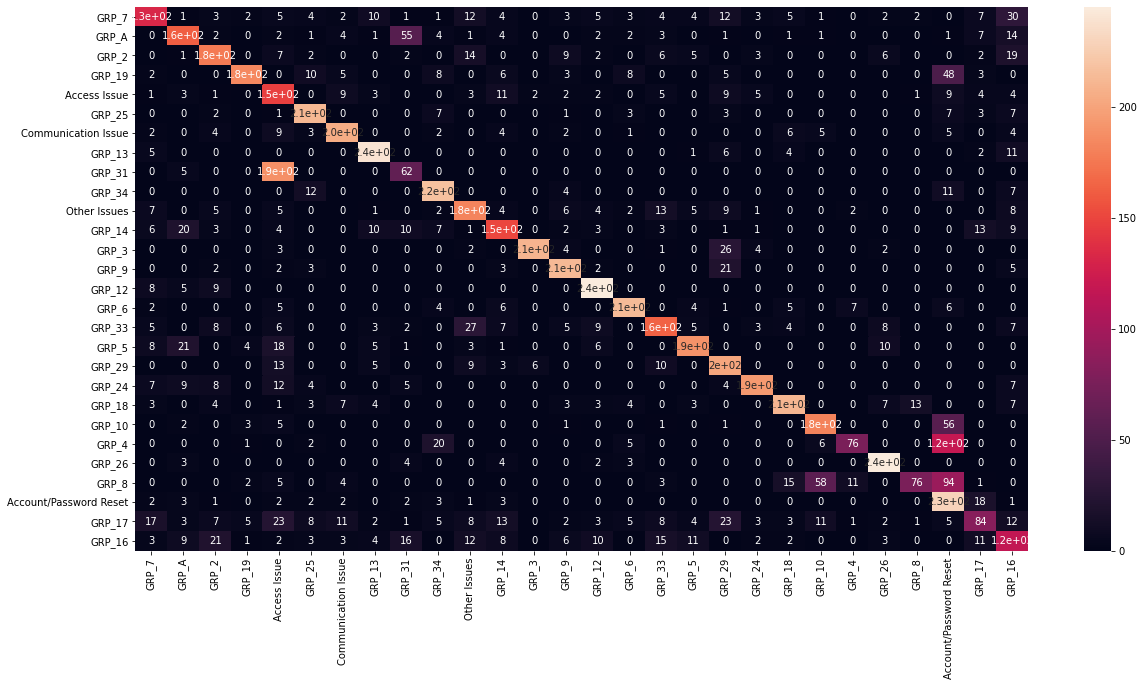

In [52]:
print ('Precision Score:', precision_score(y_test, NB_y_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, NB_y_pred, pos_label='Positive', average='weighted'))
F1score = f1_score(NB_y_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(classification_report(y_test,NB_y_pred))
cm = confusion_matrix(y_test, NB_y_pred)
cm_df = pd.DataFrame(cm,value,value)
plt.figure(figsize=(20,10))  
sns.heatmap(cm_df, annot=True)

**Support Vector Machine (SVM)**

In [54]:
# Creating SVC Model
svm_model = SVC(kernel='linear',C=10)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print('Training Accuracy:', 100*svm_model.score(X_train , y_train))
print('Test Accuracy:',100*svm_model.score(X_test , y_test))

# Update model results in result dataframe
loc = result_df[result_df['Model']=='SVM'].index
result_df['Test_Accuracy'][loc] = (svm_model.score(X_test, y_test))

Training Accuracy: 90.30979451340356
Test Accuracy: 87.52607425949103


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'Positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.



Precision Score: 0.8997728427393605
Recall Score: 0.8752607425949103
F1 Score: 0.8742563571055941
                        precision    recall  f1-score   support

          Access Issue       0.87      0.91      0.89       255
Account/Password Reset       0.87      0.80      0.83       259
   Communication Issue       0.84      0.87      0.85       268
                GRP_10       0.98      0.83      0.90       282
                GRP_12       0.91      0.90      0.91       221
                GRP_13       0.99      0.96      0.97       246
                GRP_14       0.97      0.98      0.97       252
                GRP_16       0.99      1.00      1.00       269
                GRP_17       0.72      0.98      0.83       256
                GRP_18       0.98      0.96      0.97       252
                GRP_19       0.88      0.95      0.91       256
                 GRP_2       0.92      0.94      0.93       244
                GRP_24       0.93      0.95      0.94       252
     

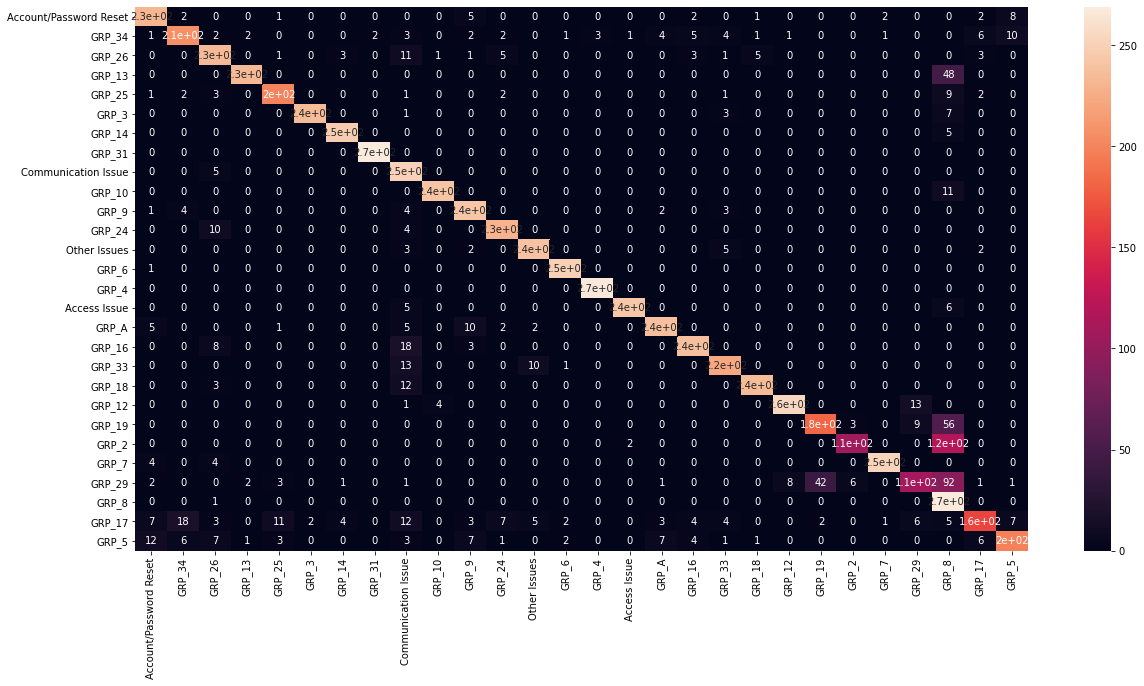

In [55]:
print ('Precision Score:', precision_score(y_test, y_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, y_pred, pos_label='Positive', average='weighted'))

F1score = f1_score(y_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,value,value)
plt.figure(figsize=(20,10))  
sns.heatmap(cm_df, annot=True)

**Decision Tree**

In [53]:
# Using Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
y_predict = dt_model.predict(X_test)
print('Training Accuracy:',100*dt_model.score(X_train, y_train))
print('Test Accuracy:',100*dt_model.score(X_test , y_test))
loc = result_df[result_df['Model']=='D-Tree'].index
result_df['Test_Accuracy'][loc] = (dt_model.score(X_test , y_test))

Training Accuracy: 91.77358228156184
Test Accuracy: 88.3048254762898


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'Positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.



Precision Score: 0.9102980679845095
Recall Score: 0.883048254762898
F1 Score: 0.8811938264498997
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       259
           1       0.85      0.85      0.85       268
           2       0.89      0.86      0.87       255
           3       0.97      0.83      0.90       282
           4       0.93      0.93      0.93       221
           5       0.97      0.97      0.97       246
           6       0.97      0.98      0.97       252
           7       0.99      1.00      1.00       269
           8       0.72      0.98      0.83       256
           9       0.96      0.96      0.96       252
          10       0.90      0.96      0.93       256
          11       0.91      0.96      0.94       244
          12       0.95      0.98      0.96       252
          13       0.98      1.00      0.99       251
          14       0.99      1.00      0.99       267
          15       0.97      0.96     

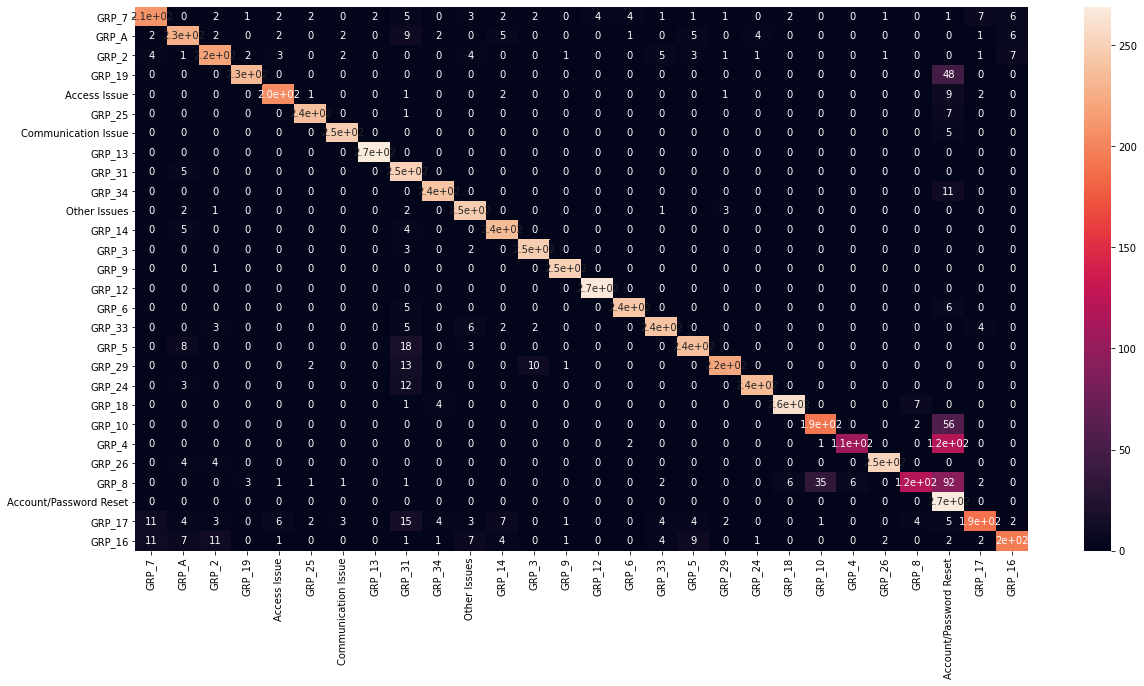

In [55]:
print ('Precision Score:', precision_score(y_test, y_predict, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, y_predict, pos_label='Positive', average='weighted'))

F1score = f1_score(y_predict, y_test, average='weighted')
print('F1 Score:', F1score)

print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(cm,value,value)
plt.figure(figsize=(20,10))  
sns.heatmap(cm_df, annot=True)

**Random Forest Classifier**

In [56]:
#Using Random Forest Classifier
rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators = 50)

In [57]:
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
print('Training Accuracy:', 100*rfcl.score(X_train , y_train))
print('Test Accuracy:',100*rfcl.score(X_test , y_test))
loc = result_df[result_df['Model']=='RandomForest'].index
result_df['Test_Accuracy'][loc] = (rfcl.score(X_test , y_test))

Training Accuracy: 91.77358228156184
Test Accuracy: 88.86107634543178


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'Positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.



Precision Score: 0.9163111226736764
Recall Score: 0.8886107634543179
F1 Score: 0.8864859155433626
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       259
           1       0.85      0.88      0.86       268
           2       0.87      0.90      0.89       255
           3       0.98      0.83      0.90       282
           4       0.92      0.93      0.93       221
           5       0.98      0.97      0.98       246
           6       0.96      0.98      0.97       252
           7       0.99      1.00      0.99       269
           8       0.73      0.98      0.84       256
           9       0.98      0.96      0.97       252
          10       0.91      0.96      0.94       256
          11       0.94      0.96      0.95       244
          12       0.94      0.98      0.96       252
          13       0.98      1.00      0.99       251
          14       1.00      1.00      1.00       267
          15       0.98      0.96    

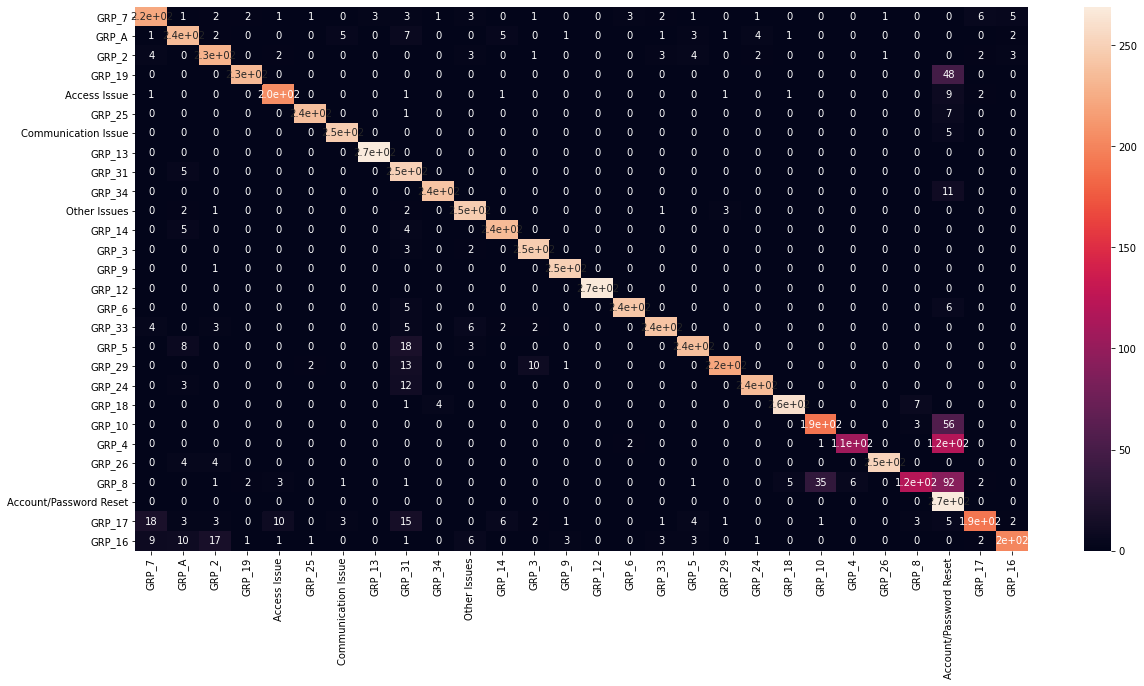

In [58]:
print ('Precision Score:', precision_score(y_test, test_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, test_pred, pos_label='Positive', average='weighted'))

F1score = f1_score(test_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(classification_report(y_test,test_pred))
cm = confusion_matrix(y_test, test_pred)
cm_df = pd.DataFrame(cm,value,value)
plt.figure(figsize=(20,10))  
sns.heatmap(cm_df, annot=True)

# **Ensemble Techniques**

**Voting Classifier with Bagging**

In [61]:
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier() 
svc = SVC()
rg = RidgeClassifier()

In [62]:
# Ensemble of Bagging Classifiers
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), 
                                    ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 
                                                     'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    test_accuracy = round(scores.mean(),2)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (test_accuracy, scores.std(), label))

# Update model results in result dataframe
loc = result_df[result_df['Model']=='Bagging_Ensemble'].index
result_df['Test_Accuracy'][loc] = test_accuracy

Accuracy: 0.89 (+/- 0.01) [Random Forest]
Accuracy: 0.89 (+/- 0.01) [Extra Trees]
Accuracy: 0.81 (+/- 0.01) [KNeighbors]
Accuracy: 0.88 (+/- 0.01) [SVC]
Accuracy: 0.71 (+/- 0.01) [Ridge Classifier]
Accuracy: 0.88 (+/- 0.01) [Ensemble]


**Boosting Classifier**

In [53]:
from xgboost import XGBClassifier
# Ensemble of Boosting Classifiers
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    test_accuracy = round(scores.mean(),2)
    print("Mean: {0:.2f} of [{1}]".format(test_accuracy, label))

# Update model results in result dataframe
loc = result_df[result_df['Model']=='Boosting_Ensemble'].index
result_df['Test_Accuracy'][loc] = test_accuracy   

Mean: 0.15 of [Ada Boost]


KeyboardInterrupt: ignored

In [54]:
result_df

NameError: ignored

**Model Tuning**

We will fine tune all the models built to see if we can improve the performance

**Multinomial Naive Bayes**

In [59]:
def find_optimal_k(X,y, lr_list):  
  # empty list that will hold cv scores
  scores = []
  for lr in lr_list:
    model_nb = MultinomialNB(alpha = lr)
    model = model_nb.fit(X_train, y_train)
    # predict the response on the crossvalidation train
    predict = model.predict(X_test)
    
    # evaluate accuracy
    accuracy = accuracy_score(y_test, predict, normalize=True)
    scores.append(accuracy)
    
    # changing to misclassification error
    mean_square_error = [1 - x for x in scores]

  # determining best alpha
  optimal_alpha = lr_list[mean_square_error.index(min(mean_square_error))]
  print('\nThe optimal alpha is ', optimal_alpha)

  plt.figure(figsize=(10,6))
  plt.plot(lr_list, mean_square_error,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. alpha Value')
  plt.xlabel('alpha')
  plt.ylabel('Error Rate')

  print("the misclassification error for each k value is : ", np.round(mean_square_error,3))
    
  return optimal_alpha


The optimal alpha is  1e-05
the misclassification error for each k value is :  [0.312 0.312 0.312 0.312 0.312 0.312 0.312 0.312 0.312 0.312 0.312 0.312
 0.313 0.313 0.313 0.313 0.313 0.314 0.314 0.314 0.314 0.314 0.314 0.314
 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314
 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314
 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.314 0.315 0.315 0.315
 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315
 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315
 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315 0.315
 0.315 0.315 0.315]
The optimal K found is:  1e-05


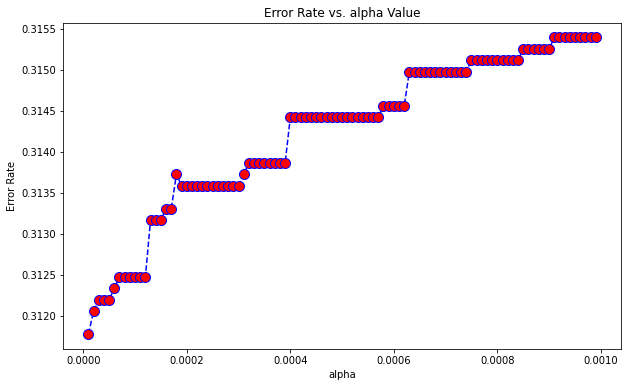

In [60]:
lr_lst = np.arange(0.00001, 0.001, 0.00001)
best_lr = find_optimal_k(X_train ,y_train, lr_lst)
print("The optimal K found is: ", best_lr)

In [61]:
Tuned_NBModel = MultinomialNB(alpha = best_lr)
Tuned_NBModel.fit(X_train, y_train)
NB_y_pred = Tuned_NBModel.predict(X_test)
print('NB Training Accuracy:', 100*Tuned_NBModel.score(X_train , y_train))
print('NB Test Accuracy:', 100*Tuned_NBModel.score(X_test , y_test))

NB Training Accuracy: 71.60390806995585
NB Test Accuracy: 68.82213878459184


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'Positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.



Precision Score: 0.7164292988461867
Recall Score: 0.6882213878459185
F1 Score: 0.6909281935241788
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       259
           1       0.66      0.60      0.63       268
           2       0.69      0.70      0.70       255
           3       0.91      0.66      0.77       282
           4       0.32      0.67      0.43       221
           5       0.80      0.86      0.83       246
           6       0.82      0.81      0.82       252
           7       0.84      0.89      0.86       269
           8       0.39      0.24      0.30       256
           9       0.78      0.88      0.83       252
          10       0.66      0.71      0.69       256
          11       0.66      0.62      0.64       244
          12       0.97      0.83      0.90       252
          13       0.81      0.86      0.84       251
          14       0.82      0.92      0.87       267
          15       0.86      0.84    

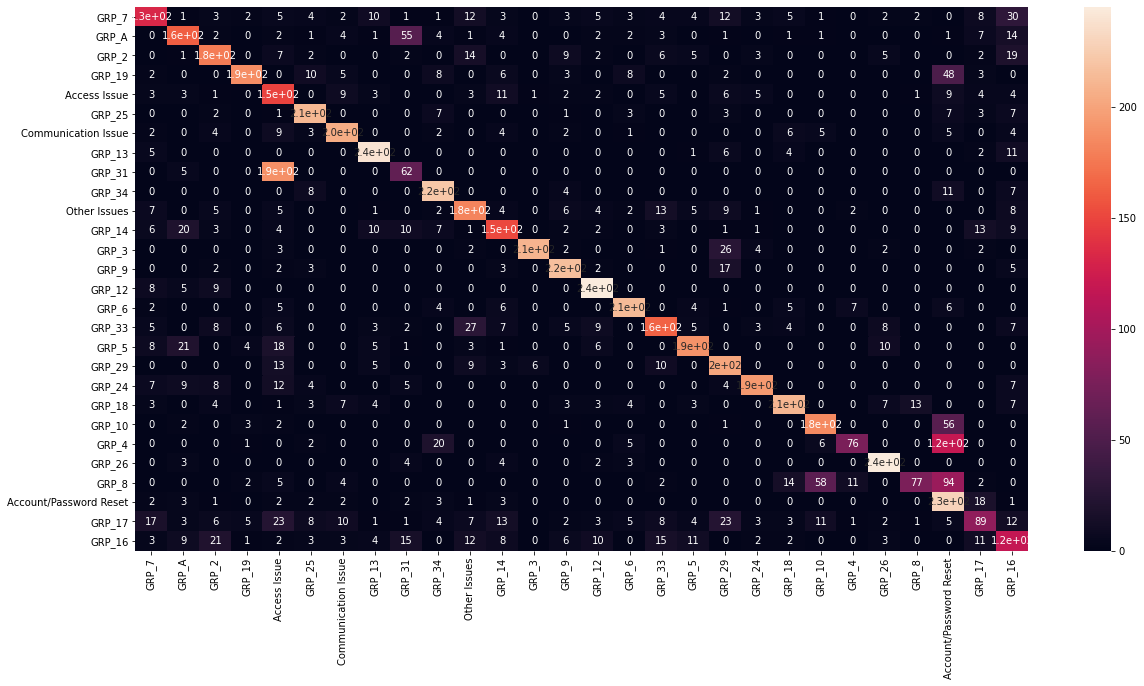

In [62]:
print ('Precision Score:', precision_score(y_test, NB_y_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, NB_y_pred, pos_label='Positive', average='weighted'))
F1score = f1_score(NB_y_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(classification_report(y_test,NB_y_pred))
cm = confusion_matrix(y_test,NB_y_pred)
cm_df = pd.DataFrame(cm,value,value)
plt.figure(figsize=(20,10))  
sns.heatmap(cm_df, annot=True)

**Observation :**

Initially we had Training Accuracy = 71.2% and Testing = 68.5%
After fine tuning we saw an improvement of 0.4% ; Training = 71.6% and Testing = 68.8%

**Support Vector Machine**

The kernel used for SVM is 'linear'. We can use grid search to get optimal parameters that gives best accuracy

In [63]:
#Set parameters for grid search
param = {
 'C': [0.001, 0.01, 0.1, 1, 10, 100] , 'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'kernel': ['linear'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100] , 'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'kernel': ['rbf'],
 'C':[0.001, 0.01, 0.1, 1, 10, 100] , 'kernel':['poly']
                   }             

model_svm = GridSearchCV(SVC(random_state=0), param, cv=10, scoring='accuracy')

In [ ]:
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
print("train score - " + str(model_svm.score(X_train, y_train)))
print("test score - " + str(model_svm.score(X_test, y_test)))

In [ ]:
print ('Precision Score:', precision_score(y_test, y_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, y_pred, pos_label='Positive', average='weighted'))

F1score = f1_score(y_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,value,value)
plt.figure(figsize=(20,10))  
sns.heatmap(cm_df, annot=True)

**Observation :**

**Decision Tree**

In [51]:
#setting parameters for grid search
max_dep_range = [4,5,8,10, 12,15,18,20,25,30, 40,50,60,70,80]
min_lf = np.arange(4,20,2)
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': max_dep_range}, {'min_samples_leaf': min_lf}]
GD = GridSearchCV(dt_model, tree_param)
GD.fit(X_train,y_train)
print("Best Hyper Parameters for DT:\n",GD.best_params_)

Best Hyper Parameters for DT:
 {'criterion': 'entropy', 'max_depth': 80}


In [52]:
#building model with best parameters
DT_model = DecisionTreeClassifier(criterion = 'entropy', max_depth= 80)
DT_model.fit(X_train,y_train)
y_pred = DT_model.predict(X_test)
print('DT train accuracy after Grid Search:', DT_model.score(X_train , y_train))
print('DT test accuracy after Grid Search:', DT_model.score(X_test , y_test))

DT train accuracy after Grid Search: 0.8770557351969681
DT test accuracy after Grid Search: 0.8400778751216799


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'Positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.



Precision Score: 0.8962364874600885
Recall Score: 0.8400778751216799
F1 Score: 0.8294670970434609
                        precision    recall  f1-score   support

          Access Issue       0.89      0.81      0.85       255
Account/Password Reset       0.87      0.73      0.79       259
   Communication Issue       0.84      0.81      0.82       268
                GRP_10       0.98      0.79      0.87       282
                GRP_12       0.92      0.86      0.89       221
                GRP_13       0.97      0.93      0.95       246
                GRP_14       0.98      0.95      0.97       252
                GRP_16       0.99      0.96      0.98       269
                GRP_17       0.38      0.98      0.54       256
                GRP_18       0.96      0.96      0.96       252
                GRP_19       0.87      0.87      0.87       256
                 GRP_2       0.91      0.94      0.93       244
                GRP_24       0.95      0.91      0.93       252
     

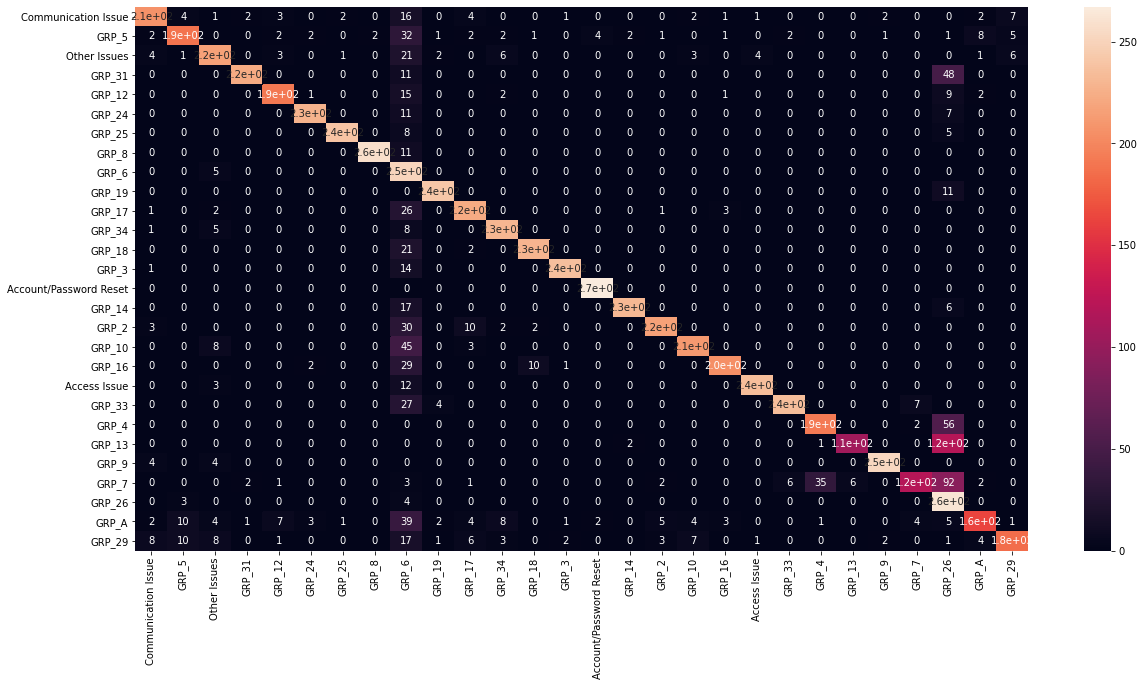

In [53]:
print ('Precision Score:', precision_score(y_test, y_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, y_pred, pos_label='Positive', average='weighted'))

F1score = f1_score(y_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,value,value)
plt.figure(figsize=(20,10))  
sns.heatmap(cm_df, annot=True)

**Observation :**

**Random Forest**

In [64]:
param_grid = {'criterion':['gini','entropy'],'n_estimators':[50,100,150,200,250]}
gs = GridSearchCV(rfcl,param_grid)
gs

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,


In [58]:
#get best parameter
gs.fit(X_train,y_train)
print("Best Hyper Parameters:\n",gs.best_params_)

Best Hyper Parameters:
 {'criterion': 'entropy', 'n_estimators': 250}


In [65]:
#Build Modl with best parameters got from Grind Search
rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators = 250)
rfcl = rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_test)
acc_RFGS = accuracy_score(y_test, y_pred)
print('Training Accuracy:', 100*rfcl.score(X_train , y_train))
print('Test Accuracy:',100*rfcl.score(X_test , y_test))

Training Accuracy: 91.77358228156184
Test Accuracy: 88.94451397580309


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'Positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.



Precision Score: 0.9162401148903435
Recall Score: 0.8894451397580309
F1 Score: 0.8872338254650625
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       259
           1       0.85      0.87      0.86       268
           2       0.89      0.90      0.90       255
           3       0.98      0.83      0.90       282
           4       0.92      0.94      0.93       221
           5       0.98      0.97      0.98       246
           6       0.96      0.98      0.97       252
           7       0.99      1.00      0.99       269
           8       0.73      0.98      0.84       256
           9       0.98      0.96      0.97       252
          10       0.90      0.96      0.93       256
          11       0.96      0.96      0.96       244
          12       0.95      0.97      0.96       252
          13       0.98      1.00      0.99       251
          14       1.00      1.00      1.00       267
          15       0.98      0.96    

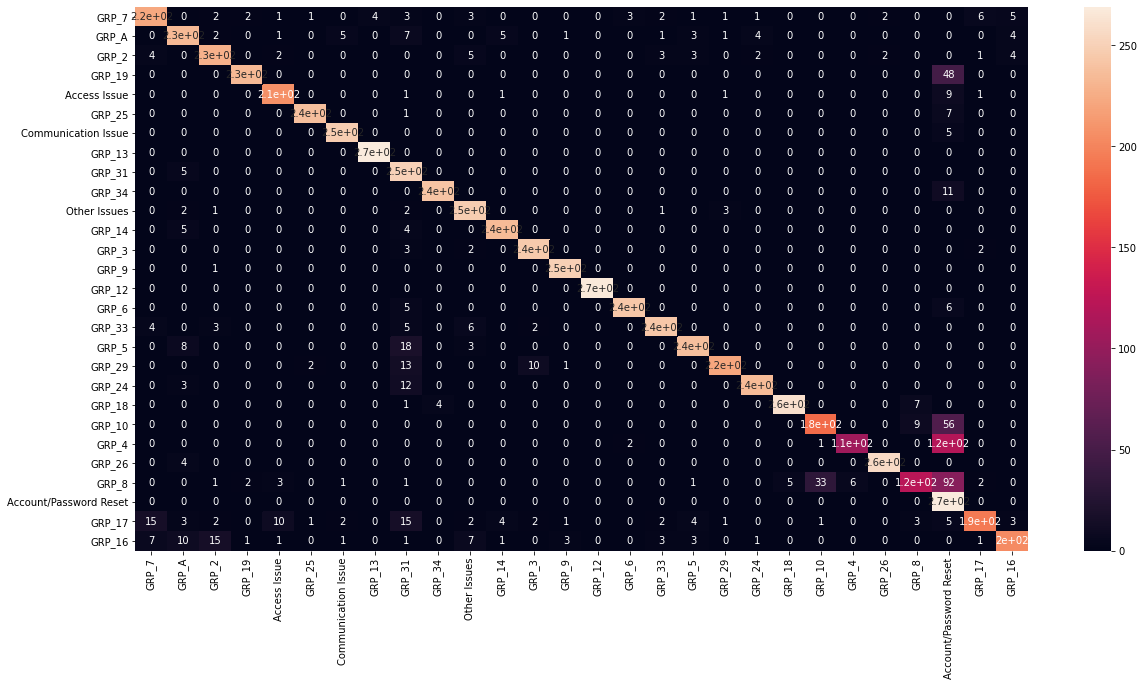

In [66]:
print ('Precision Score:', precision_score(y_test, y_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, y_pred, pos_label='Positive', average='weighted'))

F1score = f1_score(y_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,value,value)
plt.figure(figsize=(20,10))  
sns.heatmap(cm_df, annot=True)

**Observation :**

# **Generating Word Embeddings**

In [51]:
# word_counts: A dictionary of words and their counts.
# word_docs: A dictionary of words and how many documents each appeared in.
# word_index: A dictionary of words and their uniquely assigned integers.
# document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

max_features = 1000
maxlen = maxlen 
print(maxlen)
embedding_size = 200
tokenizer = Tokenizer(num_words=max_features)
# fit the tokenizer on the documents
tokenizer.fit_on_texts(Ticket_resampled['Description'])

# summarizy of parameters
print("Word Count:",tokenizer.word_counts)
print("Word index:", tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size:", vocab_size)

844
Word Count: OrderedDict([('unable', 2345), ('launch', 122), ('outlook', 1687), ('allow', 478), ('open', 1268), ('email', 3435), ('inbox', 86), ('connect', 1369), ('user', 5447), ('system', 3404), ('use', 2121), ('teamviewer', 176), ('send', 1272), ('uacyltoe', 794), ('hxgaycze', 641), ('mail', 1374), ('mailbox', 173), ('confirm', 628), ('advise', 638), ('close', 417), ('reopen', 25), ('outllok', 7), ('check', 2249), ('caller', 213), ('now', 978), ('issue', 4403), ('resolve', 888), ('german', 185), ('call', 2091), ('disconnect', 118), ('problem', 1666), ('ap', 557), ('vpn', 995), ('home', 188), ('good', 1455), ('one', 1197), ('temperory', 2), ('workmen', 2), ('nxcfastp', 2), ('xnwtyebg', 2), ('whose', 11), ('vvandwkjis', 2), ('login', 1432), ('ess', 158), ('lock', 677), ('kiosk', 18), ('re', 964), ('set', 760), ('password', 3026), ('snip', 2), ('tool', 4842), ('shortcut', 5), ('hellow', 5), ('someone', 279), ('install', 513), ('polycom', 8), ('flash', 45), ('player', 26), ('update',

In [52]:
X_emb = tokenizer.texts_to_sequences(Ticket_resampled['Description'])
X_emb = pad_sequences(X_emb, maxlen = maxlen)
y_emb = np.asarray(Ticket_resampled['Assignment group'])

print("Number of Samples:", len(X_emb))
print(X_emb[10])
print(y_emb[10])
print(X_emb.shape)
print(y_emb.shape)

Number of Samples: 35952
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  

**LSTM**

In [53]:
# Split train and test data (80:20)
X_train_p,X_test_p, y_train_p, y_test_p =  train_test_split(X_emb, y_emb,test_size =0.20,random_state= 42)
print("\nSplit train and test data")
print("Training data size:", X_train_p.shape)
print("Test data size:",     X_test_p.shape)


Split train and test data
Training data size: (28761, 844)
Test data size: (7191, 844)


In [54]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, TimeDistributed,LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model

In [70]:
LSTM_Model = tf.keras.models.Sequential([
              tf.keras.layers.Embedding(vocab_size, output_dim=100, input_length=maxlen),
              tf.keras.layers.LSTM(64, return_sequences=True,dropout=0.2),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.TimeDistributed(Dense(32, activation='relu')),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(28, activation='softmax')])

LSTM_Model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training the model...')
filepath="LSTM_Model_Weights.best.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]
# Fit the model
LSTM_Model.fit(X_train_p, y_train_p, validation_split=0.2, epochs=20, batch_size=100,  shuffle=True, callbacks=callbacks_list, verbose=1)
# Save Model and Weights locally
LSTM_Model.save("LSTM_Model.h5")
print("LSTM_Model and weights")
print('Model Trained')

Training the model...
Epoch 1/20
230/231 [============================>.] - ETA: 0s - loss: 1.8806 - accuracy: 0.4695
Epoch 00001: val_accuracy improved from -inf to 0.69007, saving model to LSTM_Model_Weights.best.hdf5
231/231 [==============================] - 22s 97ms/step - loss: 1.8804 - accuracy: 0.4696 - val_loss: 2.7307 - val_accuracy: 0.6901
Epoch 2/20
230/231 [============================>.] - ETA: 0s - loss: 0.8672 - accuracy: 0.7446
Epoch 00002: val_accuracy did not improve from 0.69007
231/231 [==============================] - 20s 86ms/step - loss: 0.8671 - accuracy: 0.7446 - val_loss: 1.5764 - val_accuracy: 0.6558
Epoch 3/20
230/231 [============================>.] - ETA: 0s - loss: 0.6182 - accuracy: 0.8097
Epoch 00003: val_accuracy did not improve from 0.69007
231/231 [==============================] - 20s 86ms/step - loss: 0.6182 - accuracy: 0.8097 - val_loss: 39.3592 - val_accuracy: 0.0511
Epoch 4/20
230/231 [============================>.] - ETA: 0s - loss: 0.5122 -

In [71]:
score, acc = LSTM_Model.evaluate(X_train_p, y_train_p,
                            batch_size=100)
print('Train accuracy:', acc)

288/288 [==============================] - 9s 30ms/step - loss: 0.3762 - accuracy: 0.9040
Train accuracy: 0.9040367007255554


In [72]:
score, acc = LSTM_Model.evaluate(X_test_p, y_test_p,
                            batch_size=100)
print('Test accuracy:', acc)
loc = result_df[result_df['Model']=='LSTM'].index
result_df['Test_Accuracy'][loc] = acc

72/72 [==============================] - 2s 29ms/step - loss: 0.6269 - accuracy: 0.8748
Test accuracy: 0.8748435378074646


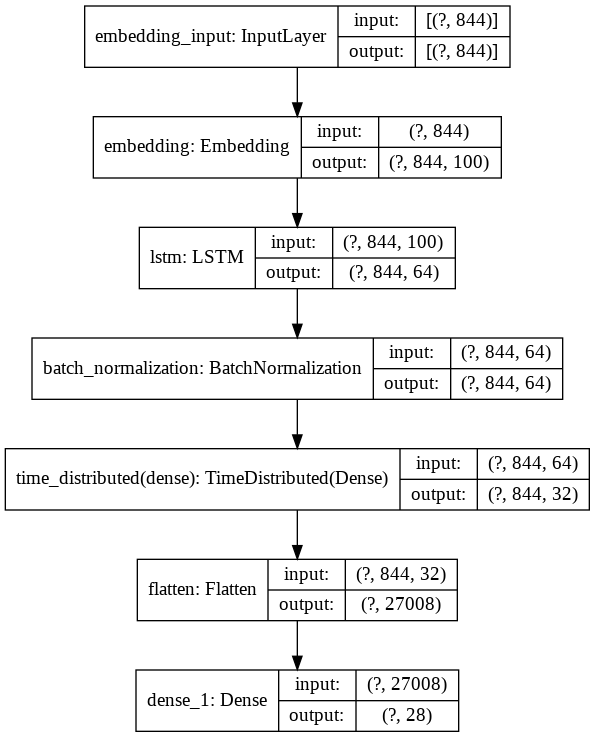

In [73]:
from tensorflow.keras.utils import plot_model
plot_model(LSTM_Model, to_file='model_plot_model_LSTM.png', show_shapes=True, show_layer_names=True)

**DNN**

In [74]:
from tensorflow.keras.models import Sequential
# Build a DNN Model for Text classification

def Model_DNN(shape, nClasses, dropout=0.2):
    model = Sequential()
    node = maxlen 
    nLayers = 4 # number of  hidden layer

    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()  
    return model

In [75]:
model_DNN = Model_DNN(X_train.shape[1], 28 )

model_DNN.fit(X_train_p, y_train_p,
                              validation_split=0.2,
                              epochs=20,
                              batch_size=100,
                              verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 844)               713180    
_________________________________________________________________
dropout (Dropout)            (None, 844)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 844)               713180    
_________________________________________________________________
dropout_1 (Dropout)          (None, 844)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 844)               713180    
_________________________________________________________________
dropout_2 (Dropout)          (None, 844)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 844)              

In [61]:
# Final evaluation of the model
scores_DNN_train = model_DNN.evaluate(X_train_p, y_train_p, verbose=0)
scores_DNN_test = model_DNN.evaluate(X_test_p, y_test_p, verbose=0)
# scores_DNN_train
print("Train Acc: %.2f%",  (scores_DNN_train[1]*100))
print("Test Acc: %.2f%",  (scores_DNN_test[1]*100))
loc = result_df[result_df['Model']=='DNN'].index
result_df['Test_Accuracy'][loc] = scores_DNN_test[1]

Train Acc: %.2f% 66.2807285785675
Test Acc: %.2f% 62.98150420188904


In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_auc_score(y, y_classes, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y)
    y = lb.transform(y)
    y_classes = lb.transform(y_classes)
    return roc_auc_score(y, y_classes, average="weighted")

# predict teams
y_team = model_DNN.predict_classes(X_test_p, verbose=0)

# precision
precision = precision_score(y_test_p, y_team, average='weighted')
print('Precision: %f' % precision)
# recall
recall = recall_score(y_test_p, y_team, average='weighted')
print('Recall: %f' % recall)
# F1 score
f1 = f1_score(y_test_p, y_team, average='weighted')
print('F1 score: %f' % f1)

auc = multiclass_auc_score(y_test_p, y_team)
print('ROC AUC: %f' % auc)

Precision: 0.658135
Recall: 0.629815
F1 score: 0.619488
ROC AUC: 0.807998


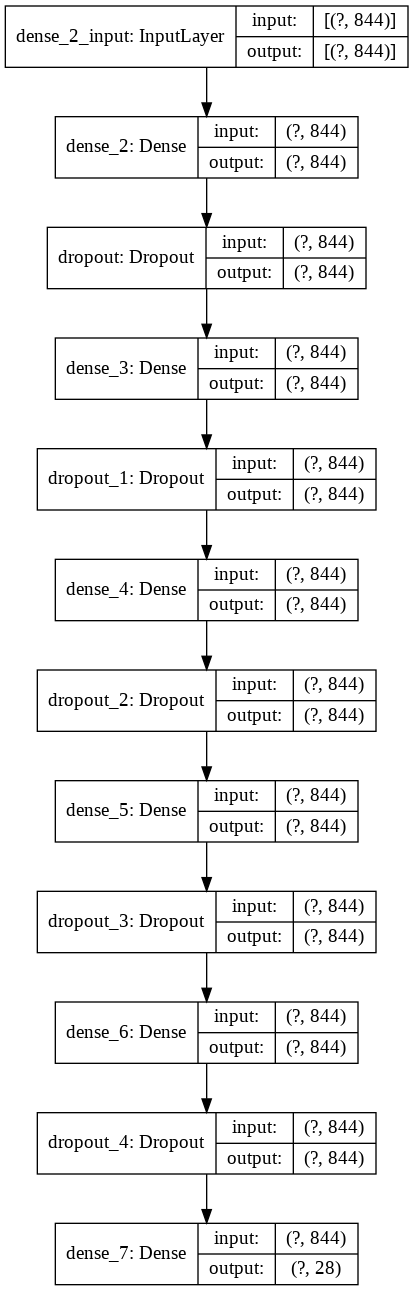

In [64]:
from tensorflow.keras.utils import plot_model
plot_model(model_DNN, to_file='model_plot_model_DNN.png', show_shapes=True, show_layer_names=True)

**Stacked LSTM**

In [62]:
LSTM_Model_b = tf.keras.models.Sequential()
LSTM_Model_b.add(tf.keras.layers.Embedding(vocab_size, output_dim=100, input_length=maxlen))
LSTM_Model_b.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True,dropout=0.2)))
LSTM_Model_b.add(tf.keras.layers.BatchNormalization())
LSTM_Model_b.add(tf.keras.layers.TimeDistributed(Dense(32, activation='relu')))
LSTM_Model_b.add(tf.keras.layers.Flatten())
LSTM_Model_b.add(tf.keras.layers.Dense(28, activation='softmax'))

LSTM_Model_b.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training the model...')
filepath="LSTMb_Model_Weights.best.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]
# Fit the model
LSTM_Model_b.fit(X_train_p, y_train_p, validation_split=0.2, epochs=20, batch_size=100,  shuffle=True, callbacks=callbacks_list, verbose=1)
# Save Model and Weights locally
LSTM_Model_b.save("LSTM_Model_b.h5")
print("LSTM_Model and weights")
print('Model Trained')

Training the model...
Epoch 1/20
231/231 [==============================] - ETA: 0s - loss: 1.7342 - accuracy: 0.5064
Epoch 00001: val_accuracy improved from -inf to 0.61863, saving model to LSTMb_Model_Weights.best.hdf5
231/231 [==============================] - 29s 126ms/step - loss: 1.7342 - accuracy: 0.5064 - val_loss: 2.7553 - val_accuracy: 0.6186
Epoch 2/20
231/231 [==============================] - ETA: 0s - loss: 0.7707 - accuracy: 0.7713
Epoch 00002: val_accuracy improved from 0.61863 to 0.69407, saving model to LSTMb_Model_Weights.best.hdf5
231/231 [==============================] - 28s 122ms/step - loss: 0.7707 - accuracy: 0.7713 - val_loss: 1.4697 - val_accuracy: 0.6941
Epoch 3/20
231/231 [==============================] - ETA: 0s - loss: 0.5605 - accuracy: 0.8271
Epoch 00003: val_accuracy did not improve from 0.69407
231/231 [==============================] - 28s 121ms/step - loss: 0.5605 - accuracy: 0.8271 - val_loss: 10.3558 - val_accuracy: 0.1481
Epoch 4/20
231/231 [===

In [63]:
score, acc = LSTM_Model_b.evaluate(X_train_p, y_train_p,
                            batch_size=100)
print('Train accuracy:', acc)
score, acc = LSTM_Model_b.evaluate(X_test_p, y_test_p,
                            batch_size=100)
print('Test accuracy:', acc)

288/288 [==============================] - 11s 39ms/step - loss: 2.7794 - accuracy: 0.6767
Train accuracy: 0.6767497658729553
72/72 [==============================] - 3s 37ms/step - loss: 3.0395 - accuracy: 0.6603
Test accuracy: 0.6602697968482971


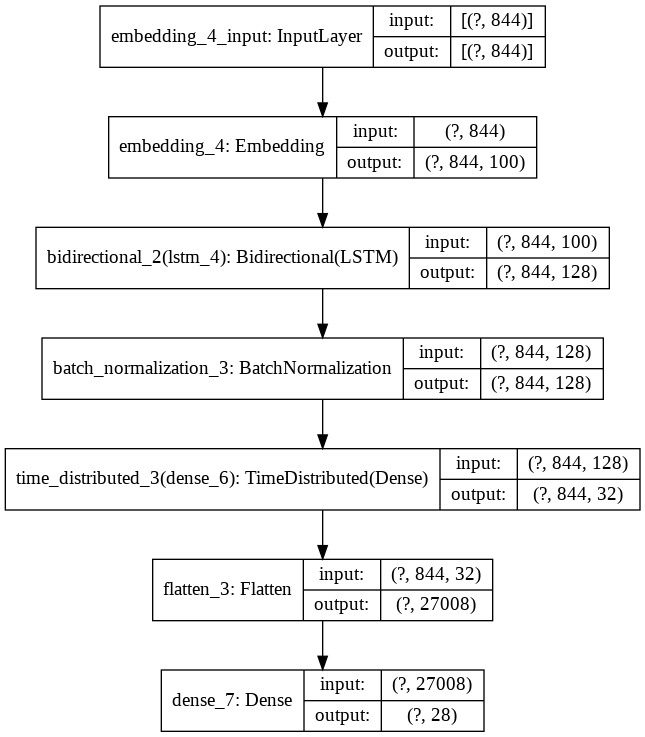

In [64]:
from tensorflow.keras.utils import plot_model
plot_model(LSTM_Model_b, to_file='model_plot_model_LSTMB.png', show_shapes=True, show_layer_names=True)